# Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

#Ecuacion de Burger en 2D
----------
La ecuación de Burger en dos dimensiones esta dada por el par de ecuaciones diferenciales parciales acopladas

\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right),
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right),
\end{equation}

cada termino de estas ecuaciones las hemos discretizado en los pasos anteriores

\begin{equation}
\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} + u^{n}_{i,j} \frac{u^{n}_{i,j} - u^{n}_{i-1,j}}{\Delta x} + v^{n}_{i,j} \frac{u^{n}_{i,j} - u^{n}_{i,j-1}}{\Delta y} = \nu \left( \frac{u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{\Delta x^2} + \frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j+1}}{\Delta y^2} \right),
\end{equation}

\begin{equation}
\frac{v^{n+1}_{i,j} - v^{n}_{i,j}}{\Delta t} + u^{n}_{i,j} \frac{v^{n}_{i,j} - v^{n}_{i-1,j}}{\Delta x} + v^{n}_{i,j} \frac{v^{n}_{i,j} - v^{n}_{i,j-1}}{\Delta y} = \nu \left( \frac{v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j}}{\Delta x^2} + \frac{v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j+1}}{\Delta y^2} \right),
\end{equation}

lo unico que queda hace es despejar de estas ecuaciones los terminos $u^{n+1}_{i,j}$ y $v^{n+1}_{i,j}$ con los cuales podemos avanzar en el tiempo

\begin{equation}
u^{n+1}_{i,j} = u^{n}_{i,j} - \frac{\Delta t}{\Delta x} u^{n}_{i,j} ( u^{n}_{i,j} - u^{n}_{i-1,j} ) - \frac{\Delta t}{\Delta y} v^{n}_{i,j} ( u^{n}_{i,j} - u^{n}_{i,j-1} ) + \frac{ \nu \Delta t}{\Delta x^2} ( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}) + \frac{ \nu \Delta t}{\Delta y^2} ( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}),
\end{equation}

\begin{equation}
v^{n+1}_{i,j} = v^{n}_{i,j} - \frac{\Delta t}{\Delta x} u^{n}_{i,j} ( v^{n}_{i,j} - v^{n}_{i-1,j} ) - \frac{\Delta t}{\Delta y} v^{n}_{i,j} ( v^{n}_{i,j} - v^{n}_{i,j-1} ) + \frac{ \nu \Delta t}{\Delta x^2} ( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j}) + \frac{ \nu \Delta t}{\Delta y^2} ( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1}),
\end{equation}
el siguiente es un ejemplo para la funcion pulso anterior.

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 0, '$y$')

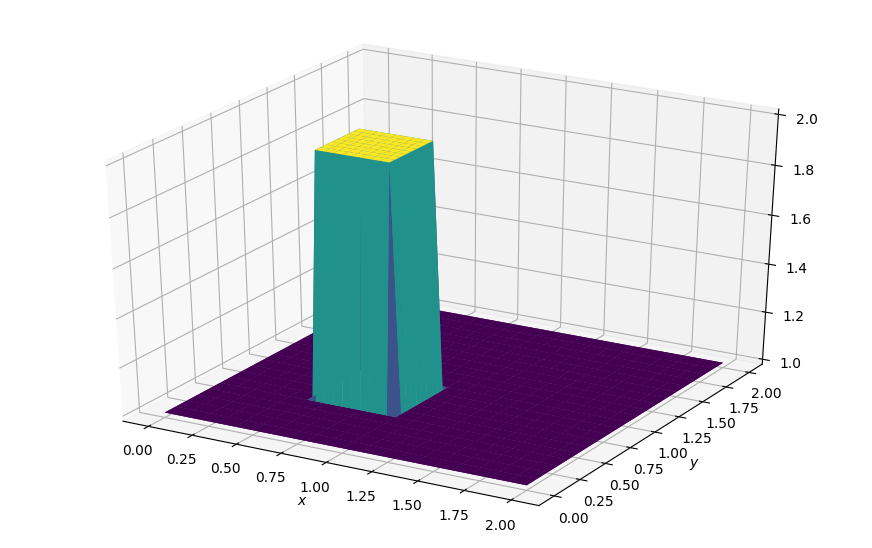

In [0]:
def pulso(x0, x1, y0, y1, x, y):
  if (x0 < x and x < x1) and (y0 < y and y < y1):
    return 1.0
  else:
    return 0.0

#declaración de variables
nx=41
ny=41
nt=120
nu= 0.05 #nu = 0.01 da error por overfloat
Lx =2.0
Ly =2.0
dx = Lx/ (nx-1)
dy= Ly/(nx-1)
CFL= 0.0009
dt=CFL*dx * dy/ nu

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

#vector de unos
u = np.ones((nx, ny))
v = np.ones((nx, ny))
un = np.ones((nx, ny))
vn = np.ones((nx, ny))

#condiciones iniciales
for i in range(nx):
  for j in range(ny):
    u[i,j] += pulso(0.5, 1.0, 0.5, 1.0, x[i], y[j])
    v[i,j] += pulso(0.5, 1.0, 0.5, 1.0, x[i], y[j])

fig = plt.figure(figsize=(11, 7), dpi = 100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [0]:
for n in range(nt + 1):
  un = u.copy()
  vn = v.copy()

  for i in range(1, nx-1):
    for j in range(1, ny-1):
      u[i,j] = un[i,j] - dt*un[i,j]*(un[i,j] - un[i-1,j])/dx - dt*vn[i,j]*(un[i,j] - un[i,j-1])/dy + nu*dt*(un[i+1,j] - 2.0*un[i,j] + un[i-1,j])/(dx*dx) + nu*dt*(un[i,j+1] - 2.0*un[i,j] + un[i,j-1])/(dy*dy)
      v[i,j] = vn[i,j] - dt*un[i,j]*(vn[i,j] - vn[i-1,j])/dx - dt*vn[i,j]*(vn[i,j] - vn[i,j-1])/dy + nu*dt*(vn[i+1,j] - 2.0*vn[i,j] + vn[i-1,j])/(dx*dx) + nu*dt*(vn[i,j+1] - 2.0*vn[i,j] + vn[i,j-1])/(dy*dy)

u[0, :] = 1
u[-1, :] = 1
u[:, 0] = 1
u[:, -1] = 1
    
v[0, :] = 1
v[-1, :] = 1
v[:, 0] = 1
v[:, -1] = 1

Text(0.5, 0, '$y$')

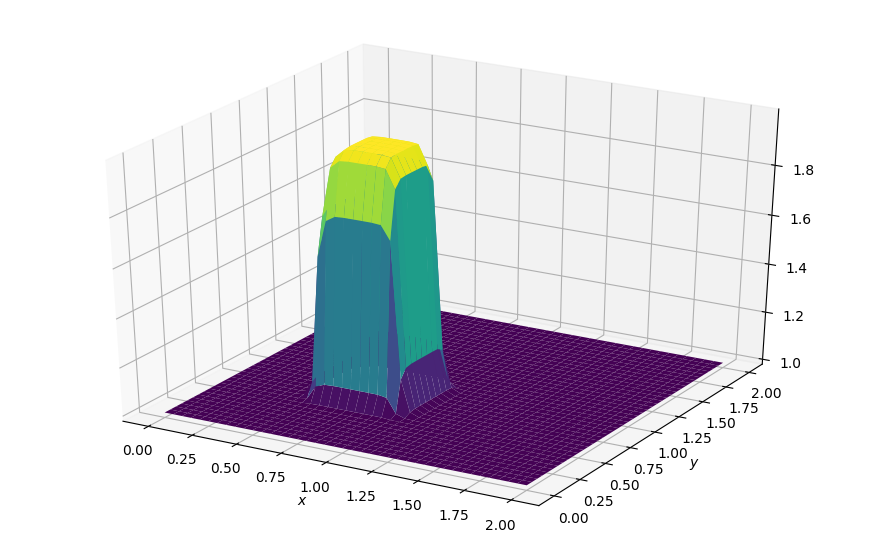

In [0]:
fig = plt.figure(figsize=(11, 7), dpi = 100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis)
#ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
#ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')